# Zadanie 1 - aktywnosc slonca

Plik spots.txt zawiera wartości aktywności Słońca w kolejnych miesiącach. Wykreśl ten sygnał oraz jego spektrum. Za pomocą FFT, oblicz częstotliwość cyklu aktywności słonecznej.  Przydatne mogą być następujące konstrukcje:

array = genfromtxt(‘spots.txt’)  (lub array=[float(x) for x in open('spots.txt').read().split()])

x = max(array)

10.0


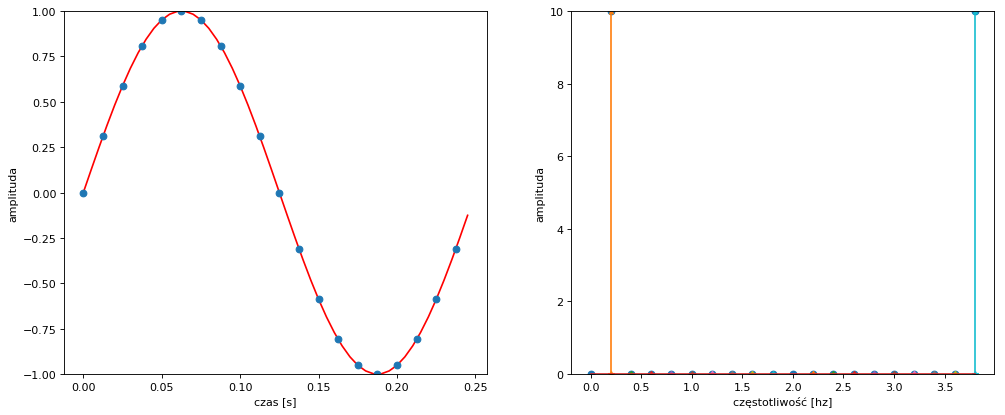

In [2]:
from __future__ import division
from pylab import *
from numpy import *
from scipy import *
from ipywidgets import *
import math as mt

%matplotlib inline

def do_the_job(A = 1, LP = 1, w = 40, f = 2.0, hz=False, labels=False):
    T = 1.0/f
    TW = 1.0/w
    t = np.arange(0, LP*T, TW)
    FUNC = lambda t : A*sin(2*pi*t*f)
    # generujemy momenty, w których pobieramy próbki
    n = len(t)
    signal = FUNC(t)                 
    # funkcja sprobkowana
    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    if labels:
        plt.xlabel("czas [s]")
        plt.ylabel("amplituda")
    ## --- 
    ax.plot(t, signal, 'o')
    
    signal1 = fft(signal)
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1)        
    # modul sygnalu

    freqs = range(int(n))
    freqs = [x*f/n for x in freqs]

    ax = fig.add_subplot(122)
    if labels:
        plt.xlabel("częstotliwość [hz]")
        plt.ylabel("amplituda")
    ymax = max(signal1)
#     ymax = max([x for x in signal1 if x < ymax])
    print(ymax)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
        
    # y = w/(f*2)*A
    stem(freqs, signal1, '-*')
    show()
    
do_the_job(hz=True, labels=True, w=80, f=4, A=1)

11.149122807017545


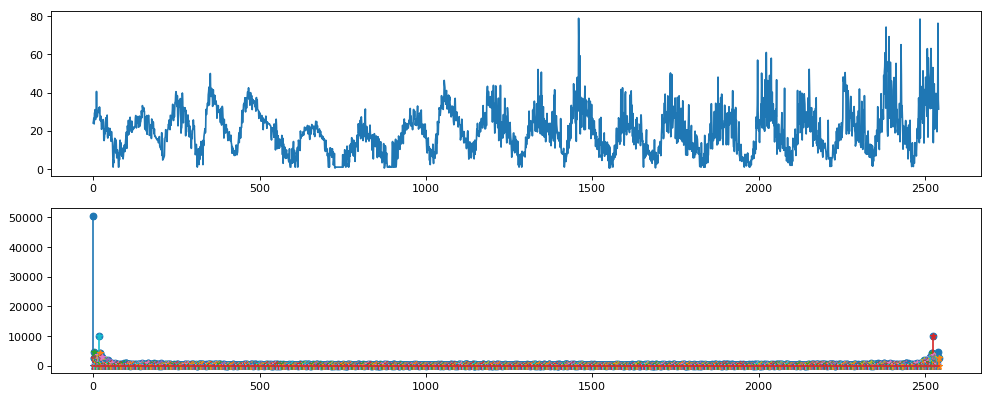

In [3]:
array=[float(x) for x in open('spots.txt').read().split()]
array
fig = plt.figure(figsize=(15, 6), dpi=80)   
ax = fig.add_subplot(211)
ax.plot(array)
signal1 = fft(array)
# sygnal w dziedzinie czestotliwosci 
signal1 = abs(signal1)
x = max(signal1[1:])
indexes = [i for (i, val) in enumerate(signal1) if val == x]
f = 1/(indexes[0] / len(signal1) * 12)

print(f)
ax = fig.add_subplot(212)
stem(signal1, '-*')
show()


# Zadanie 2 - proste filtrowanie

Wykreśl sygnał $sin(2*pi*t) + sin(4*pi*t)$, T=1s, w=20Hz. Za pomocą FFT, przekształć sygnał do dziedziny częstotliwości. Następnie usuń składowe o częstotliwości 2Hz. Tak zmodyfikowany sygnał przekształć do dziedziny czasu i wykreśl go.

In [4]:
def getValAndFFT(fun,  w = 20, T = 1):
    times = [t / w for t in range(0, w * T)]
    values = [fun(x) for x in times]
    signal = fft(values)
    return values, signal


In [18]:
def showChart(fig, total, i, signal, fft=False, abss=True):
    ax = fig.add_subplot(total, 1, i)
    if fft:
#         if isinstance(signal[0], complex):
        signal = [abs(sig) if abss else sig for sig in signal]
        stem(signal, '-*')
    else:
        ax.plot(signal)

In [6]:
def initFig():
    return plt.figure(figsize=(15, 15), dpi=80)

C:\Users\Witek\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


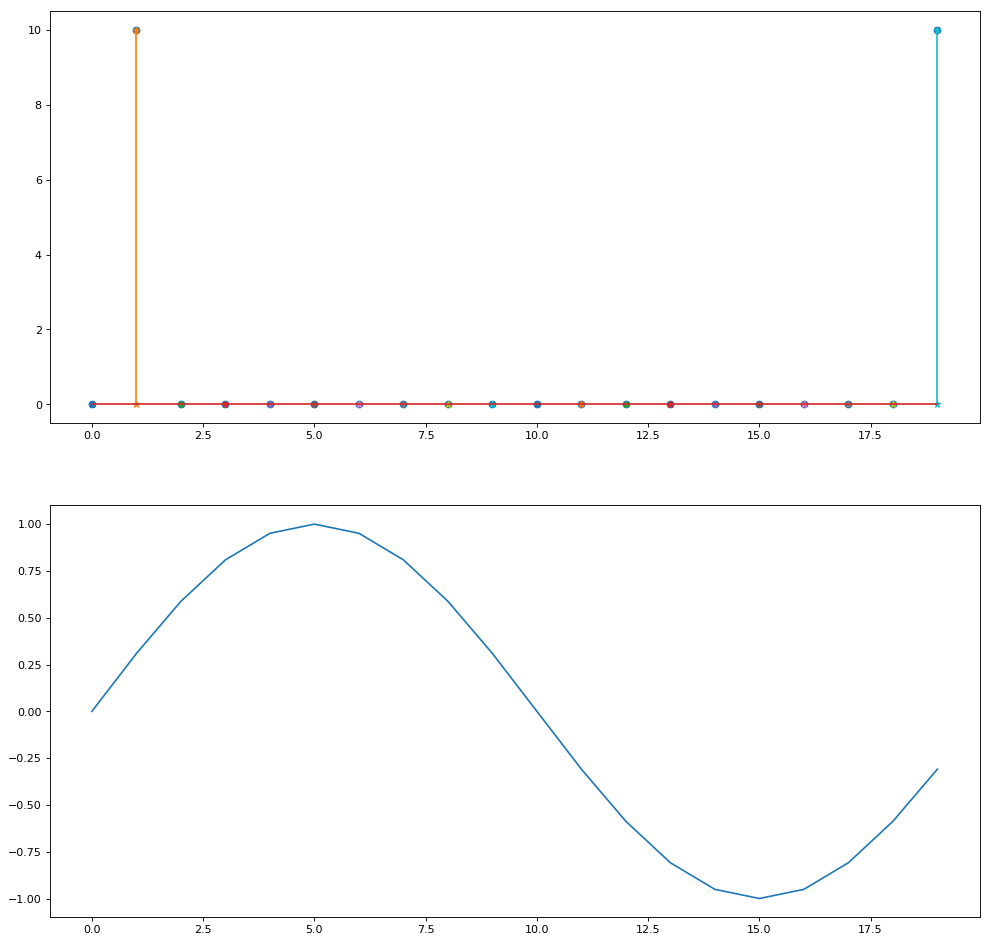

In [7]:

values, signal = getValAndFFT(lambda t: sin(2 * pi * t) + sin(4 * pi * t))
signal[2] = 0
signal[len(signal) - 2] = 0
fig = initFig()
showChart(fig, 2, 1, signal, fft=True)

rev = ifft(signal)
showChart(fig, 2, 2, rev)

# Zadanie 3 - Informacja o fazie

Wykreśl sygnał $sin(2*pi*t) + sin(4*pi*t)$, T=1s, w=20Hz. Tym razem oprócz spektrum, wykreśl wykres z informacją o fazie poszczególnych częstotliwości (faza = arg(z)), gdzie z=a+bi. To samo wykonaj dla sin(2*pi*t) + cos(4*pi*t). Porównaj otrzymane wykresy. Przydatna może być funkcja angle (z parametrem deg=True)

In [8]:
def getAngles(vals):
    return [np.angle(val, deg=True) for val in vals]

In [19]:
def showAll(fun, fig, off = 0):
    val, sig = getValAndFFT(fun)
    arg = getAngles(sig)
    showChart(fig, 6, 1 + off*3, val)
    showChart(fig, 6, 2 + off*3, sig, fft=True)
    showChart(fig, 6, 3 + off*3, arg, fft=True, abss=False)

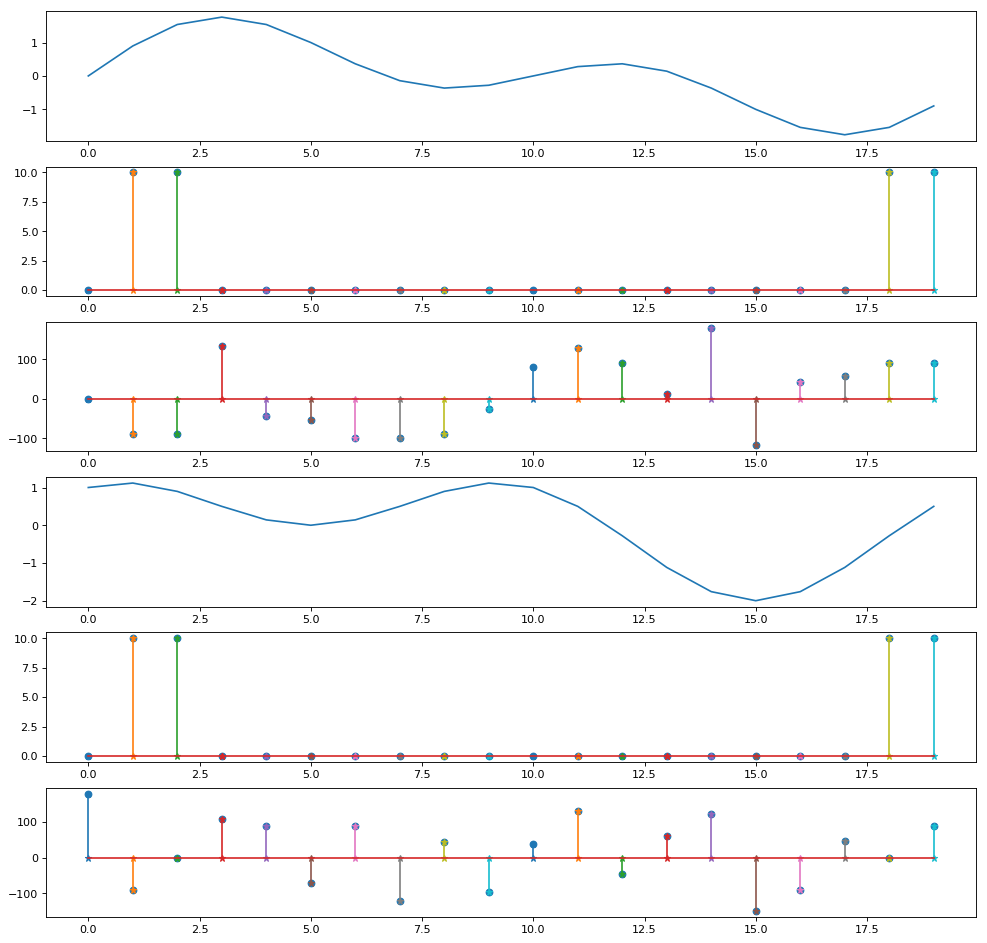

In [27]:
fig = initFig()
showAll(lambda t: sin(2 * pi * t) + sin(4 * pi * t), fig)
showAll(lambda t: sin(2 * pi * t) + cos(4 * pi * t), fig, 1)


# Zadanie 4 - plik wejsciowy audio

Wczytaj plik err.wav. Wykreśl jego spektrum. Spróbuj także skali logarytmicznej. Określ dominujące w sygnale częstotliwości. Przydatne:

import scipy.io.wavfile

w, signal = scipy.io.wavfile.read('err.wav')

signal = [s[0] for s in signal]   #Tylko pierwszy kanał

yscale(‘log’)

spectrum[::10]        # co 10-ty element


C:\Users\Witek\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


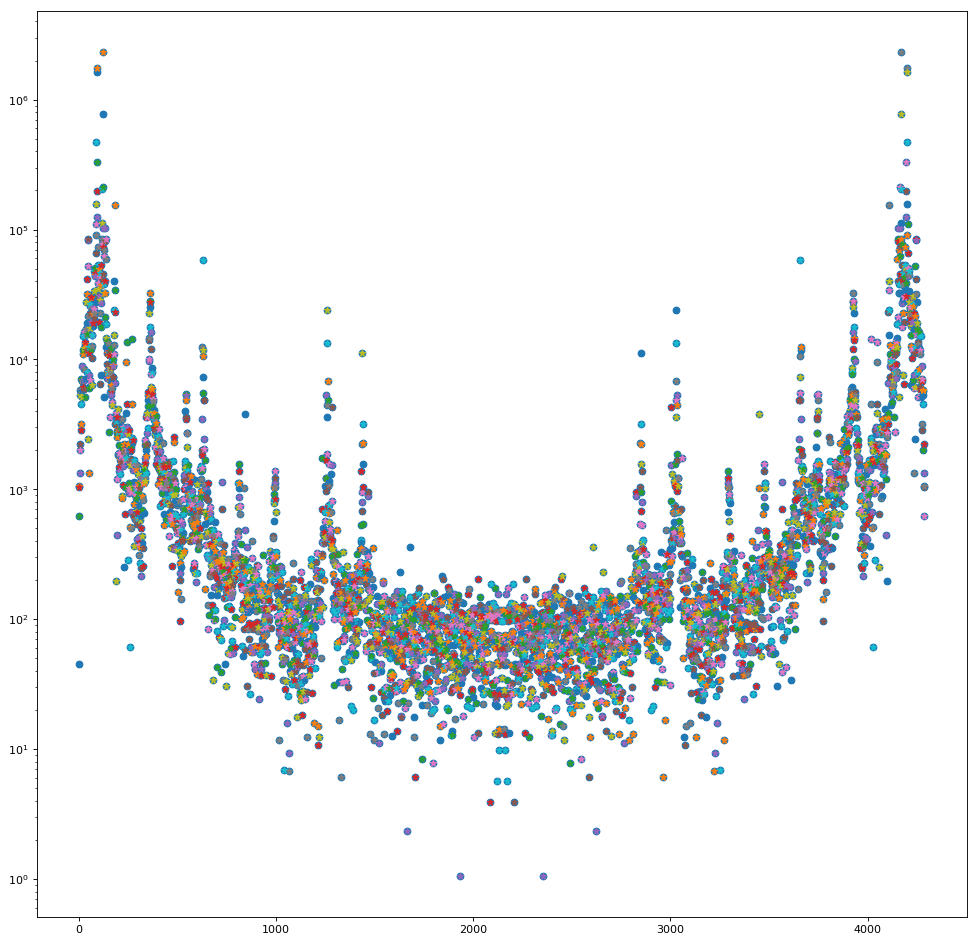

In [15]:
import scipy.io.wavfile
w, signal = scipy.io.wavfile.read('err.wav')
signal = [s[0] for s in signal] #Tylko pierwszy kanał

spectrum = fft(signal)
 # co 10-ty element
fig = initFig()
spe = spectrum[::10]
yscale('log')
showChart(fig, 1, 1, spe, fft=True)
